In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import seaborn as sns

from google.colab import drive
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving data_set.csv to data_set (1).csv


In [ ]:
data = pd.read_csv('data_set.csv')
data.head(10)

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0
5,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,...,1.0,3.0,0.0,2.0,2.0,2.0,3.0,1.0,2.0,25.0
6,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,6.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,25.0
7,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,6.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,25.0
8,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,6.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,7.0,0.0,4.0,0.0,0.0,3.0,0.0,2.0,25.0


In [ ]:
data.describe()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
count,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,...,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000
mean,0.980221,1.068890,0.714789,1.040683,0.648700,1.810474,0.918299,0.164911,0.960251,2.380657,...,0.251449,4.459892,0.504621,3.269527,0.985393,1.072003,1.219913,0.720152,1.851755,25.191729
std,0.139241,0.353034,0.931219,0.331452,0.573161,1.676994,0.412945,0.475779,0.499563,2.284152,...,0.433851,1.732288,0.624362,0.983791,0.588661,0.494758,1.225242,0.936227,1.160388,4.561691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,25.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,2.000000,25.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,5.000000,...,1.000000,5.000000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,2.000000,25.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,5.000000,...,1.000000,9.000000,2.000000,5.000000,2.000000,2.000000,3.000000,3.000000,4.000000,51.000000


Check for missing values in the dataset & Identify unique values in each column to distinguish categorical and numerical features

In [ ]:
missing_values = data.isnull().sum()
unique_values = data.nunique()

missing_values,unique_values


(VDRL_RESULT          0
 CONS_ALCOHOL         0
 RH_FACTOR            0
 SMOKER               0
 PLAN_PREGNANCY       0
 BLOOD_GROUP          0
 HAS_PREG_RISK        0
 TET_VACCINE          0
 IS_HEAD_FAMILY       0
 MARITAL_STATUS       0
 FOOD_INSECURITY      0
 NUM_ABORTIONS        0
 NUM_LIV_CHILDREN     0
 NUM_PREGNANCIES      0
 FAM_PLANNING         0
 TYPE_HOUSE           0
 HAS_FAM_INCOME       0
 LEVEL_SCHOOLING      0
 CONN_SEWER_NET       0
 NUM_RES_HOUSEHOLD    0
 HAS_FRU_TREE         0
 HAS_VEG_GARDEN       0
 FAM_INCOME           0
 HOUSING_STATUS       0
 WATER_TREATMENT      0
 AGE                  0
 dtype: int64,
 VDRL_RESULT           2
 CONS_ALCOHOL          3
 RH_FACTOR             3
 SMOKER                3
 PLAN_PREGNANCY        3
 BLOOD_GROUP           5
 HAS_PREG_RISK         3
 TET_VACCINE           3
 IS_HEAD_FAMILY        3
 MARITAL_STATUS        6
 FOOD_INSECURITY       3
 NUM_ABORTIONS         4
 NUM_LIV_CHILDREN      5
 NUM_PREGNANCIES       5
 FAM_PLANNI

Plot distributions of key numerical features to check for outliers and data patterns

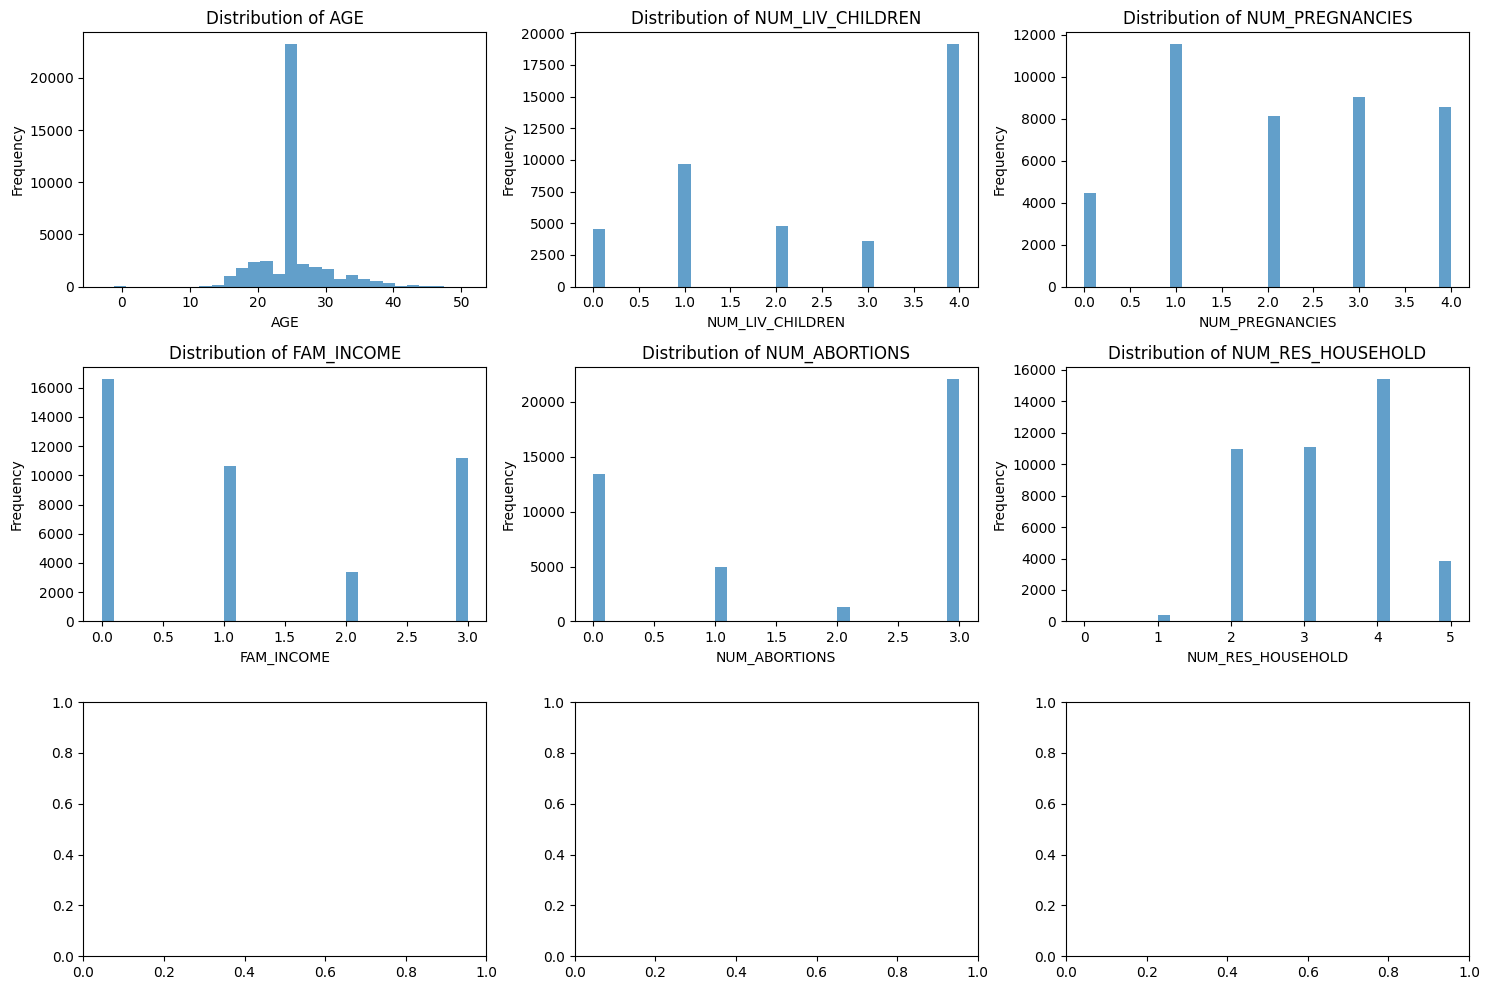

'\nAGE: Contains outliers, such as negative values, which require correction or removal.\nNUM_LIV_CHILDREN and NUM_PREGNANCIES: Appear to have reasonable distributions.\nFAM_INCOME and NUM_ABORTIONS: Seem to be skewed, indicating a need for transformation or handling of skewed distributions.\nNUM_RES_HOUSEHOLD: Generally centered, but with a few extreme values.\n'

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
numerical_columns = ['AGE', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'FAM_INCOME', 'NUM_ABORTIONS', 'NUM_RES_HOUSEHOLD']

for i, column in enumerate(numerical_columns):
    ax = axes[i // 3, i % 3]
    ax.hist(data[column], bins=30, alpha=0.7)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

"""
AGE: Contains outliers, such as negative values, which require correction or removal.
NUM_LIV_CHILDREN and NUM_PREGNANCIES: Appear to have reasonable distributions.
FAM_INCOME and NUM_ABORTIONS: Seem to be skewed, indicating a need for transformation or handling of skewed distributions.
NUM_RES_HOUSEHOLD: Generally centered, but with a few extreme values.
"""


Analyze Class Distribution for Categorical Variables

*ps: using VDRL_RESULT as target*

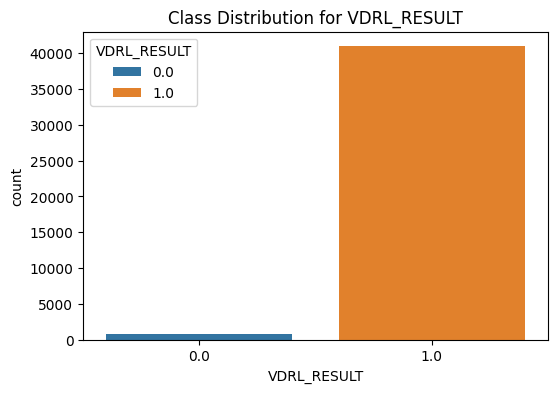

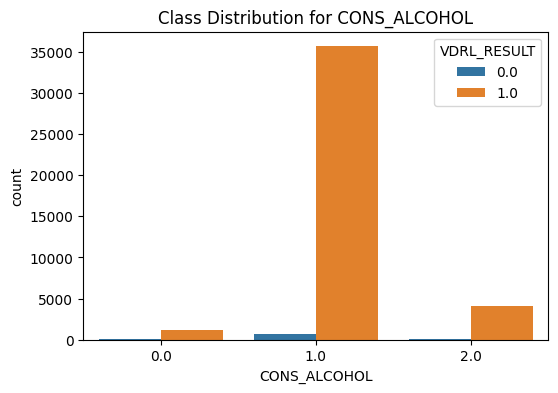

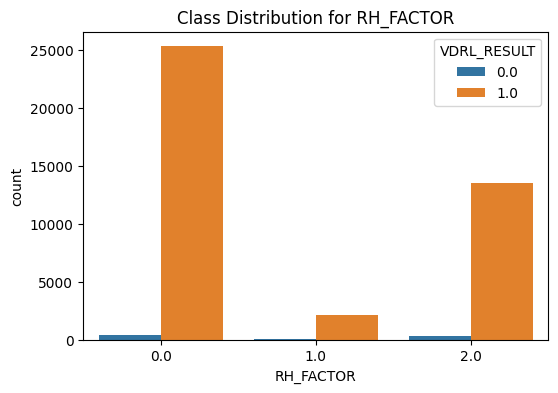

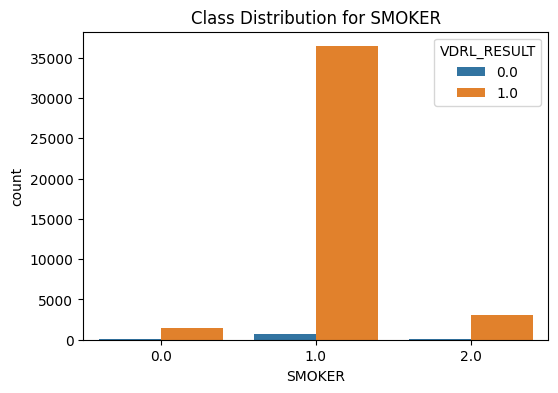

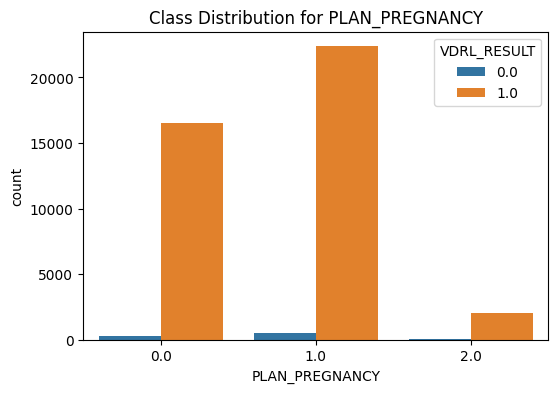

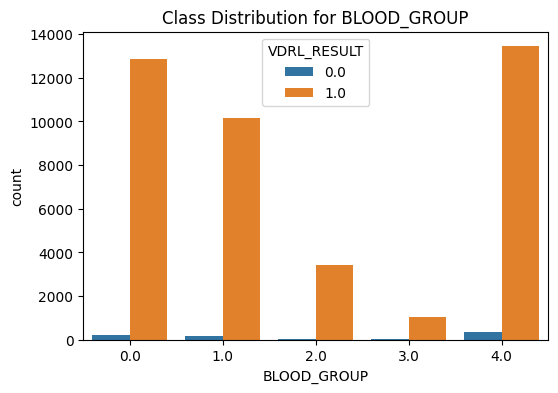

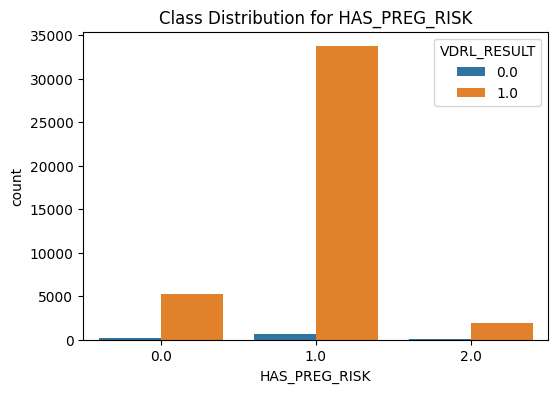

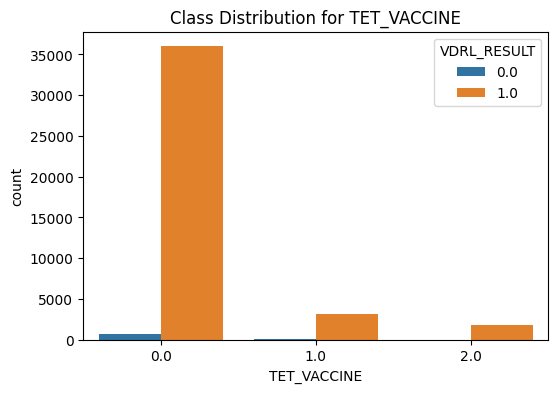

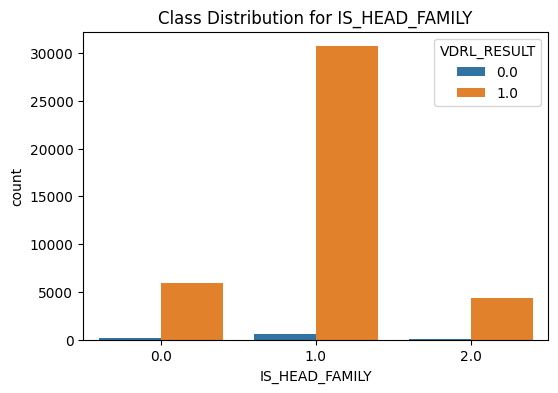

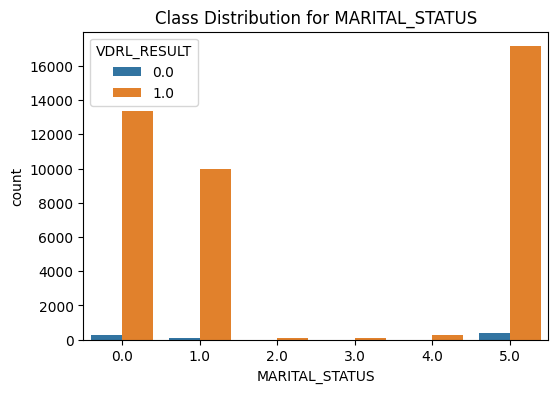

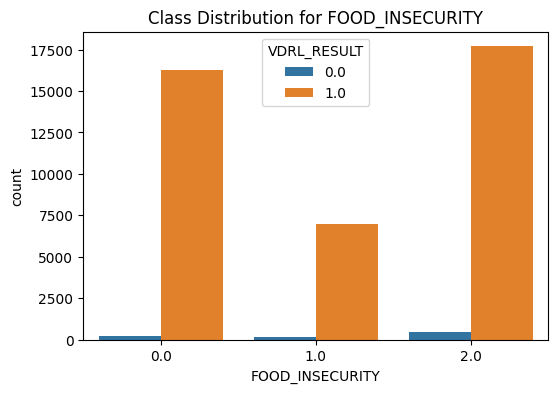

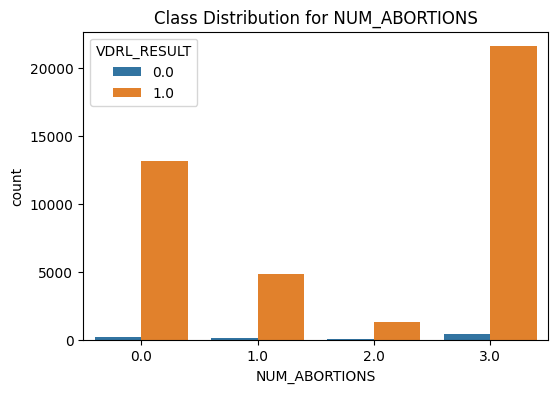

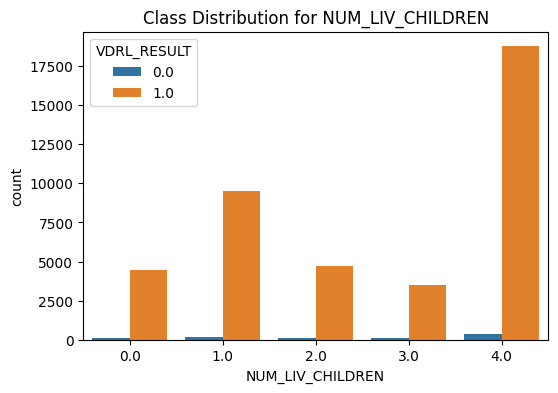

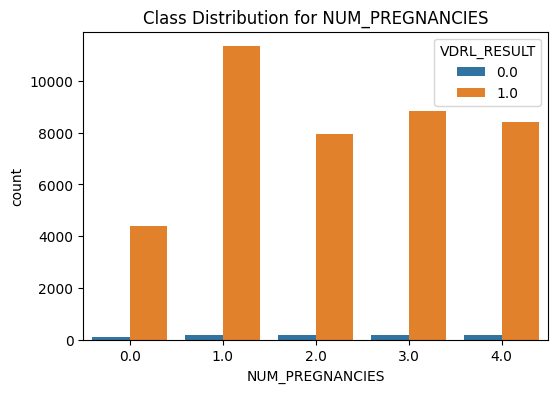

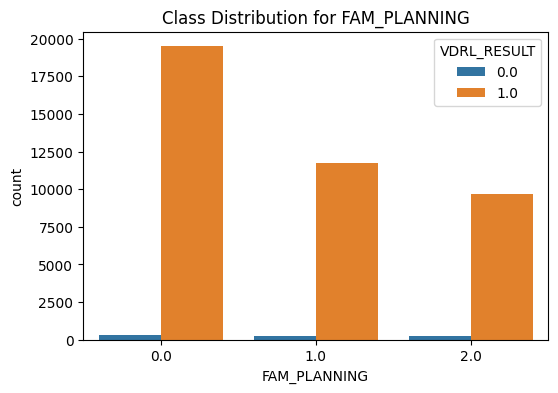

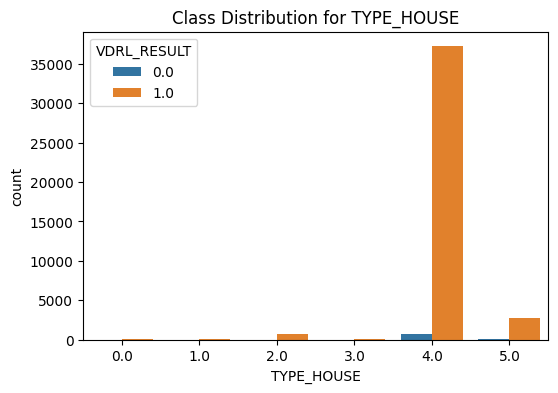

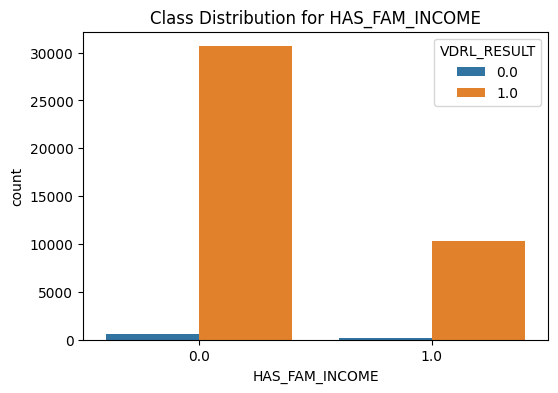

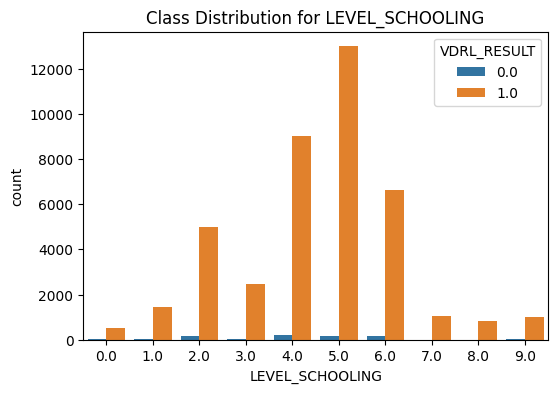

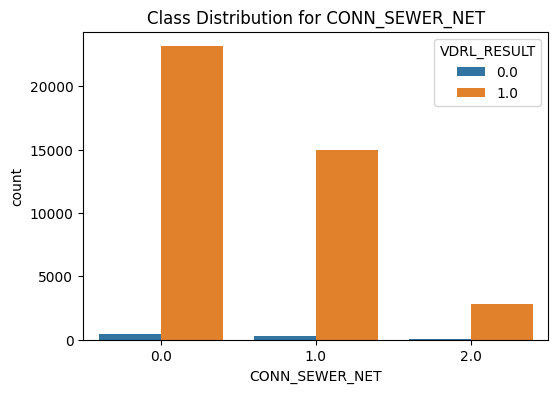

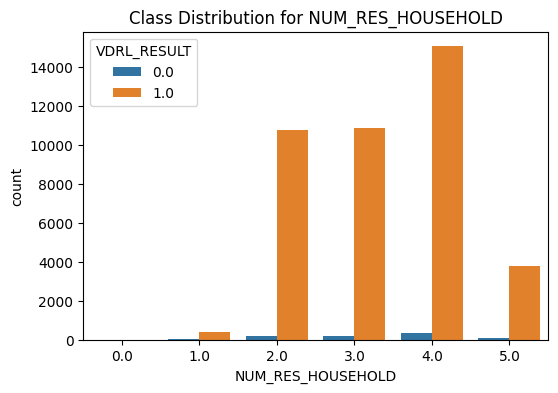

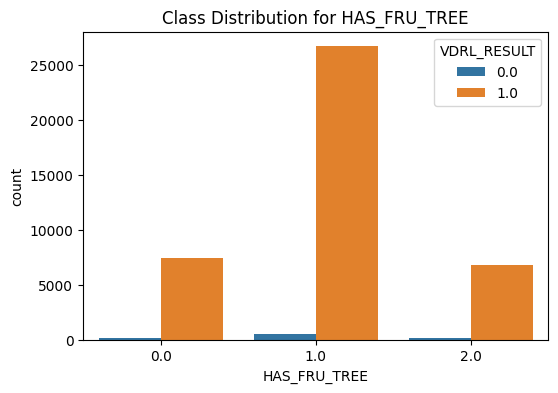

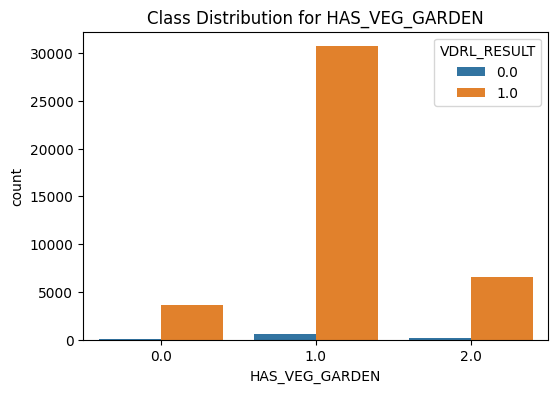

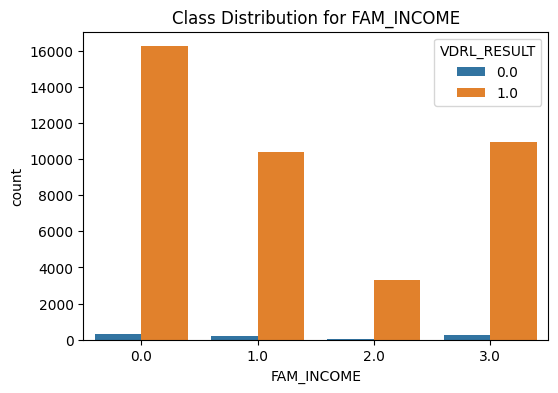

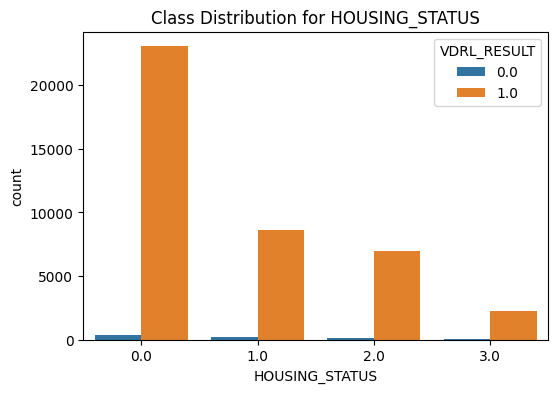

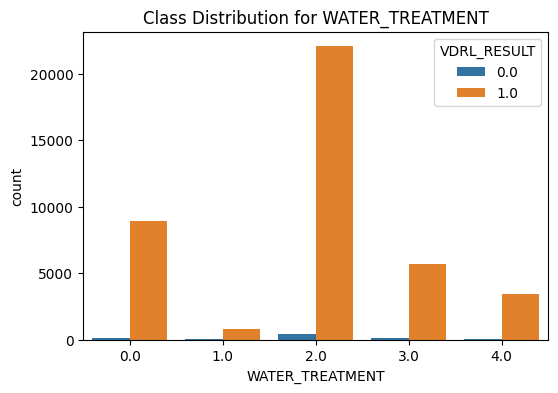

In [ ]:
categorical_variables = ['VDRL_RESULT', 'CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS', 'FOOD_INSECURITY', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 'LEVEL_SCHOOLING', 'CONN_SEWER_NET', 'NUM_RES_HOUSEHOLD', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'FAM_INCOME', 'HOUSING_STATUS', 'WATER_TREATMENT']

for column in categorical_variables:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column, hue='VDRL_RESULT')
    plt.title(f"Class Distribution for {column}")
    plt.show()

 Handling outliers in 'AGE' by removing negative values

In [ ]:
data = data[data['AGE'] >= 10]
data = data[data['AGE'] <= 50]

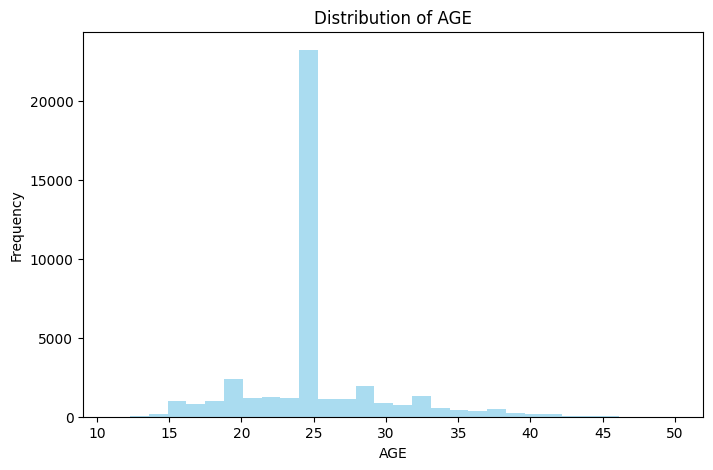

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(data['AGE'], bins=30, alpha=0.7, color='skyblue')
plt.title("Distribution of AGE")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.show()

### CLASSIFICAÇÃO - UNDER-SAMPLING

SUBSET DIVISION

In [ ]:
positives = data[data['VDRL_RESULT'] == 1]
negatives = data[data['VDRL_RESULT'] == 0]

n_negatives = len(negatives)
n_positives = n_negatives

subsample_positives = positives.sample(n=n_positives, random_state=42)
subsample_negatives = negatives.sample(n=n_negatives, random_state=42)

reduced_dataset = pd.concat([subsample_positives, subsample_negatives]).sample(frac=1, random_state=42).reset_index(drop=True)

reduced_dataset.head(), reduced_dataset['VDRL_RESULT'].value_counts()

(   VDRL_RESULT  CONS_ALCOHOL  RH_FACTOR  SMOKER  PLAN_PREGNANCY  BLOOD_GROUP  \
 0          1.0           1.0        0.0     1.0             1.0          1.0   
 1          1.0           1.0        0.0     1.0             1.0          0.0   
 2          0.0           1.0        0.0     1.0             1.0          3.0   
 3          1.0           1.0        0.0     1.0             1.0          0.0   
 4          1.0           1.0        2.0     1.0             1.0          4.0   
 
    HAS_PREG_RISK  TET_VACCINE  IS_HEAD_FAMILY  MARITAL_STATUS  ...  \
 0            1.0          0.0             1.0             5.0  ...   
 1            0.0          0.0             1.0             5.0  ...   
 2            1.0          0.0             1.0             5.0  ...   
 3            0.0          0.0             1.0             5.0  ...   
 4            0.0          0.0             2.0             5.0  ...   
 
    HAS_FAM_INCOME  LEVEL_SCHOOLING  CONN_SEWER_NET  NUM_RES_HOUSEHOLD  \
 0        

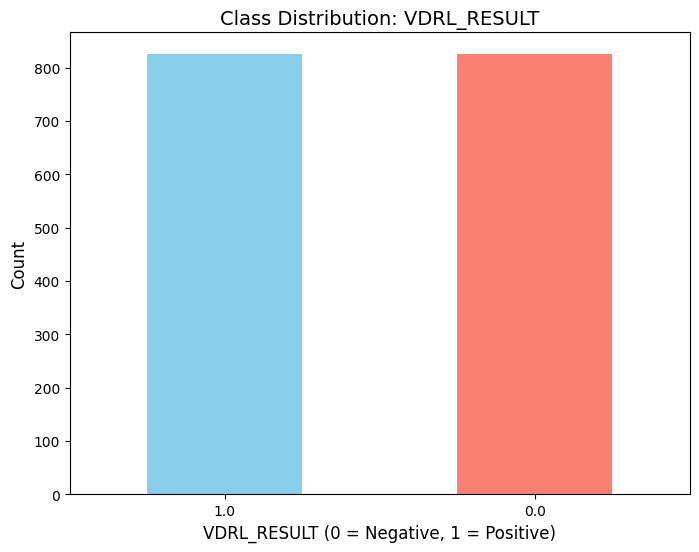

In [ ]:
plt.figure(figsize=(8, 6))
reduced_dataset['VDRL_RESULT'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: VDRL_RESULT', fontsize=14)
plt.xlabel('VDRL_RESULT (0 = Negative, 1 = Positive)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
categorical_variables = ['VDRL_RESULT', 'CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS', 'FOOD_INSECURITY', 'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 'LEVEL_SCHOOLING', 'CONN_SEWER_NET', 'NUM_RES_HOUSEHOLD', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'FAM_INCOME', 'HOUSING_STATUS', 'WATER_TREATMENT']


In [ ]:
for col in categorical_variables:
    if col in reduced_dataset.columns:
        reduced_dataset[col] = reduced_dataset[col].astype('category')

reduced_dataset.dtypes

,0
VDRL_RESULT,category
CONS_ALCOHOL,category
RH_FACTOR,category
SMOKER,category
PLAN_PREGNANCY,category
BLOOD_GROUP,category
HAS_PREG_RISK,category
TET_VACCINE,category
IS_HEAD_FAMILY,category
MARITAL_STATUS,category


In [ ]:
X = reduced_dataset.drop('VDRL_RESULT', axis=1)
y = reduced_dataset['VDRL_RESULT']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification Model - Decision Tree



In [ ]:
sfm = SelectFromModel(DecisionTreeClassifier(random_state=42))
X_train_sfm = sfm.fit_transform(X_train, y_train)
X_test_sfm = sfm.transform(X_test)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_sfm, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_sfm)

classification_report_result = classification_report(y_test, y_pred)
best_parameters = grid_search.best_params_

print("Best Parameters:", best_parameters)
print("Classification Report:\n", classification_report_result)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.64      0.60       165
         1.0       0.58      0.51      0.54       165

    accuracy                           0.57       330
   macro avg       0.57      0.57      0.57       330
weighted avg       0.57      0.57      0.57       330



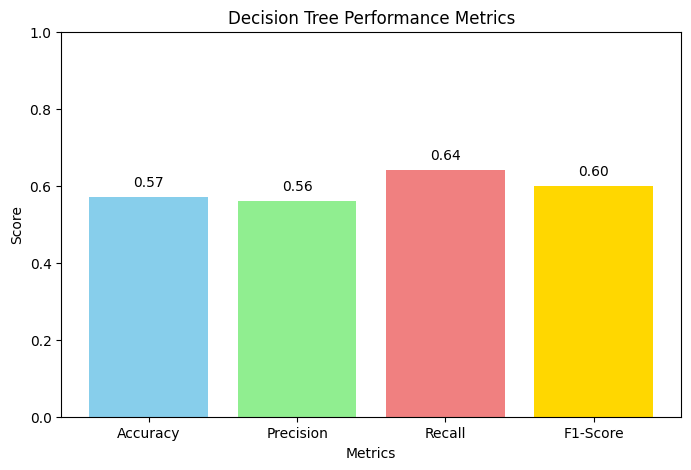

In [ ]:
import matplotlib.pyplot as plt

accuracy = 0.57
precision = 0.56
recall = 0.64
f1_score = 0.60

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.ylim(0, 1)
plt.title("Decision Tree Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Metrics")

for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

plt.show()


Classification Model - SVM (Support Vector Machines)


In [ ]:
sfm = SelectFromModel(SVC(kernel='linear', random_state=42))
X_train_sfm = sfm.fit_transform(X_train, y_train)
X_test_sfm = sfm.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svm_classifier = SVC(random_state=42)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_sfm, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_sfm)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.63      0.62       165
         1.0       0.62      0.61      0.61       165

    accuracy                           0.62       330
   macro avg       0.62      0.62      0.62       330
weighted avg       0.62      0.62      0.62       330



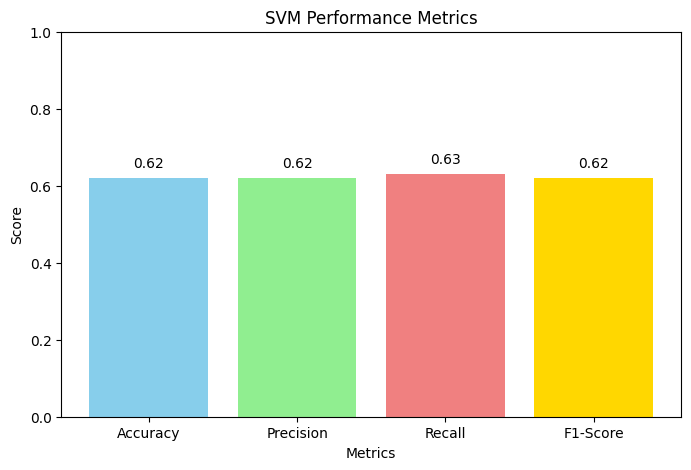

In [ ]:
import matplotlib.pyplot as plt

accuracy = 0.62
precision = 0.62
recall = 0.63
f1_score = 0.62

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.ylim(0, 1)
plt.title("SVM Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Metrics")

for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

plt.show()


### REGRESSÃO

RESET DATASET

In [ ]:
new_data = data.copy()

for col in categorical_variables:
    if col in new_data.columns:
        new_data[col] = new_data[col].astype('category')

new_data.head(10)

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0
5,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,...,1.0,3.0,0.0,2.0,2.0,2.0,3.0,1.0,2.0,25.0
6,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,6.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,25.0
7,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,6.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,25.0
8,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,6.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,7.0,0.0,4.0,0.0,0.0,3.0,0.0,2.0,25.0


LINEAR REGRESSION

In [ ]:
X = new_data.drop('AGE', axis=1)
y = new_data['AGE']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 2.9790989382970956
Root Mean Squared Error (RMSE): 4.204034776394254
Mean Absolute Percentage Error (MAPE): 0.12302457410413109


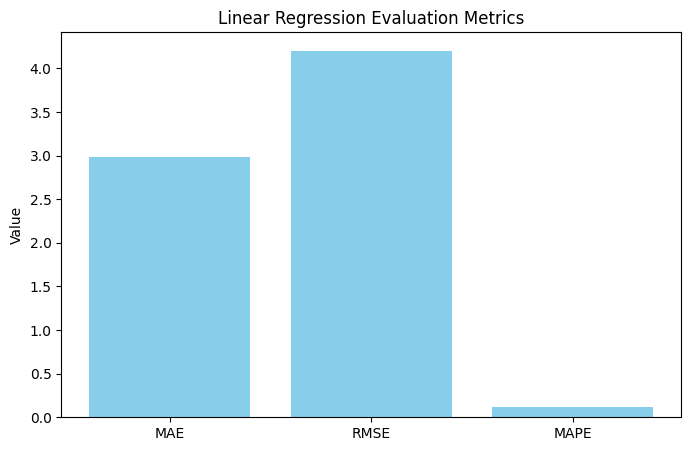

In [ ]:
metrics = ['MAE', 'RMSE', 'MAPE']
values = [mae, rmse, mape]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='skyblue')
plt.title("Linear Regression Evaluation Metrics")
plt.ylabel("Value")
plt.show()

SVR(kernel="linear")

In [ ]:
X = new_data.drop('AGE', axis=1)
y = new_data['AGE']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_regressor = SVR(kernel="linear")
svr_regressor.fit(X_train, y_train)

y_pred = svr_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 2.6576149045220543
Root Mean Squared Error (RMSE): 4.4982664979386096
Mean Absolute Percentage Error (MAPE): 0.11002346761867042


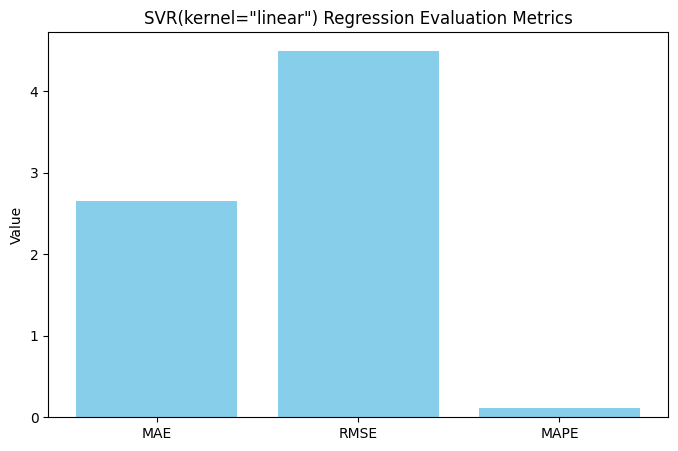

In [ ]:
metrics = ['MAE', 'RMSE', 'MAPE']
values = [mae, rmse, mape]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='skyblue')
plt.title('SVR(kernel="linear") Regression Evaluation Metrics')
plt.ylabel("Value")
plt.show()